In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('1614141926_drugEffects.csv',index_col=[0])
data.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [4]:
data.tail()

,urlDrugName,rating,effectiveness,condition,sideEffects
3102,vyvanse,10,Highly Effective,adhd,Mild Side Effects
3103,zoloft,1,Ineffective,depression,Extremely Severe Side Effects
3104,climara,2,Marginally Effective,total hysterctomy,Moderate Side Effects
3105,trileptal,8,Considerably Effective,epilepsy,Mild Side Effects
3106,micardis,4,Moderately Effective,high blood pressure,Moderate Side Effects


In [5]:
data.shape

(3107, 5)

# Data Preprocessing

In [6]:
data.dtypes

urlDrugName      object
rating            int64
effectiveness    object
condition        object
sideEffects      object
dtype: object

In [7]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [8]:
data.nunique(axis=0)


urlDrugName       502
rating             10
effectiveness       5
condition        1426
sideEffects         5
dtype: int64

In [9]:
for i in ['condition']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [10]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   urlDrugName    3107 non-null   object
 1   rating         3107 non-null   int64 
 2   effectiveness  3107 non-null   object
 3   condition      3107 non-null   object
 4   sideEffects    3107 non-null   object
dtypes: int64(1), object(4)
memory usage: 145.6+ KB


In [12]:
data.describe()

,rating
count,3107.000000
mean,7.006115
std,2.937582
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


In [13]:
data['sideEffects'].value_counts()

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [14]:
data.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [15]:
sideeffects = data.groupby('sideEffects')

In [16]:
sideeffects.first()

,urlDrugName,rating,effectiveness,condition
sideEffects,,,,
Extremely Severe Side Effects,claritin,1,Ineffective,allergies
Mild Side Effects,enalapril,4,Highly Effective,management of congestive heart failure
Moderate Side Effects,flagyl,7,Considerably Effective,bacterial vaginosis
No Side Effects,ponstel,10,Highly Effective,menstrual cramps
Severe Side Effects,ortho-tri-cyclen,1,Highly Effective,birth prevention


In [17]:
data['urlDrugName'].value_counts()

lexapro                63
prozac                 46
zoloft                 45
retin-a                45
paxil                  38
                       ..
clindamycin-topical     1
accolate                1
spiriva                 1
azor                    1
rifadin                 1
Name: urlDrugName, Length: 502, dtype: int64

In [18]:
# to display top 10 most popular drugs
data['urlDrugName'].value_counts().nlargest(10)

lexapro        63
prozac         46
zoloft         45
retin-a        45
paxil          38
synthroid      38
propecia       38
doxycycline    33
cymbalta       33
effexor        33
Name: urlDrugName, dtype: int64

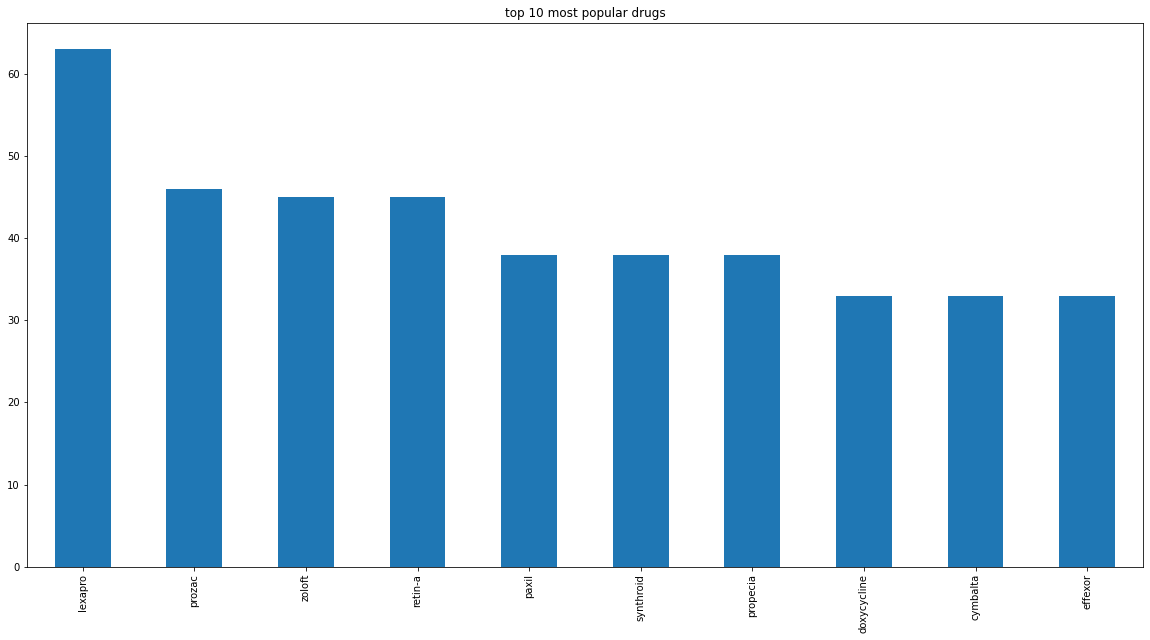

In [19]:
plt.figure(figsize=(20,10))
data['urlDrugName'].value_counts().nlargest(10).plot(kind='bar')
plt.title('top 10 most popular drugs')
plt.show()

The most popular drug is lexapro

In [20]:
#To display leatst 10 drugs
data['urlDrugName'].value_counts().nsmallest(10)

accupril             1
axert                1
depakene             1
fosamax-plus-d       1
trimethobenzamide    1
eulexin              1
azasan               1
nardil               1
tarka                1
risperdal-consta     1
Name: urlDrugName, dtype: int64

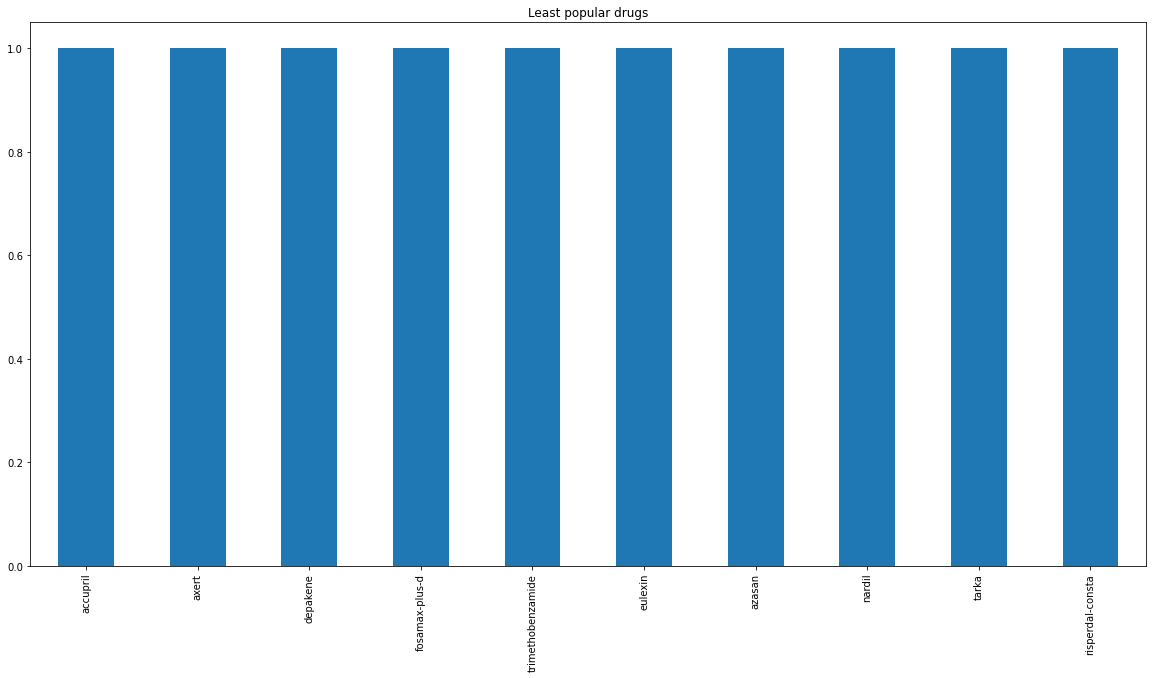

In [21]:
plt.figure(figsize=(20,10))
data['urlDrugName'].value_counts().nsmallest(10).plot(kind='bar')
plt.title('Least popular drugs')
plt.show()

The least popular drug is risperdal-consta

In [22]:
# to display no. of conditions
data['condition'].nunique()

1426

In [23]:
# Distribution of conditions
data['condition'].value_counts()

depression                                    237
acne                                          165
anxiety                                        63
insomnia                                       54
birth control                                  49
                                             ... 
muscle spasm                                    1
migraine in assoc /w upper resp infection       1
anxiety insomnia                                1
birth control/ regular periods.                 1
chronic leg pain due to trauma & surgeries      1
Name: condition, Length: 1426, dtype: int64

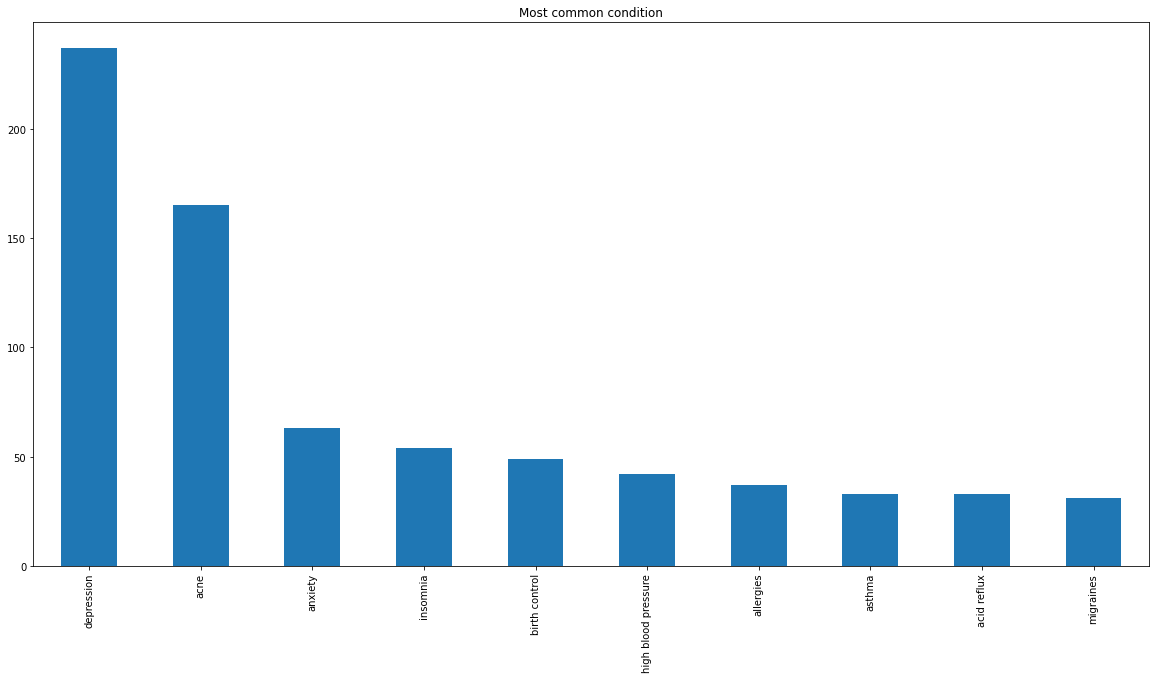

In [25]:
# To display most common conditions
plt.figure(figsize=(20,10))
data['condition'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Most common condition')
plt.show()

The most common condition is depression

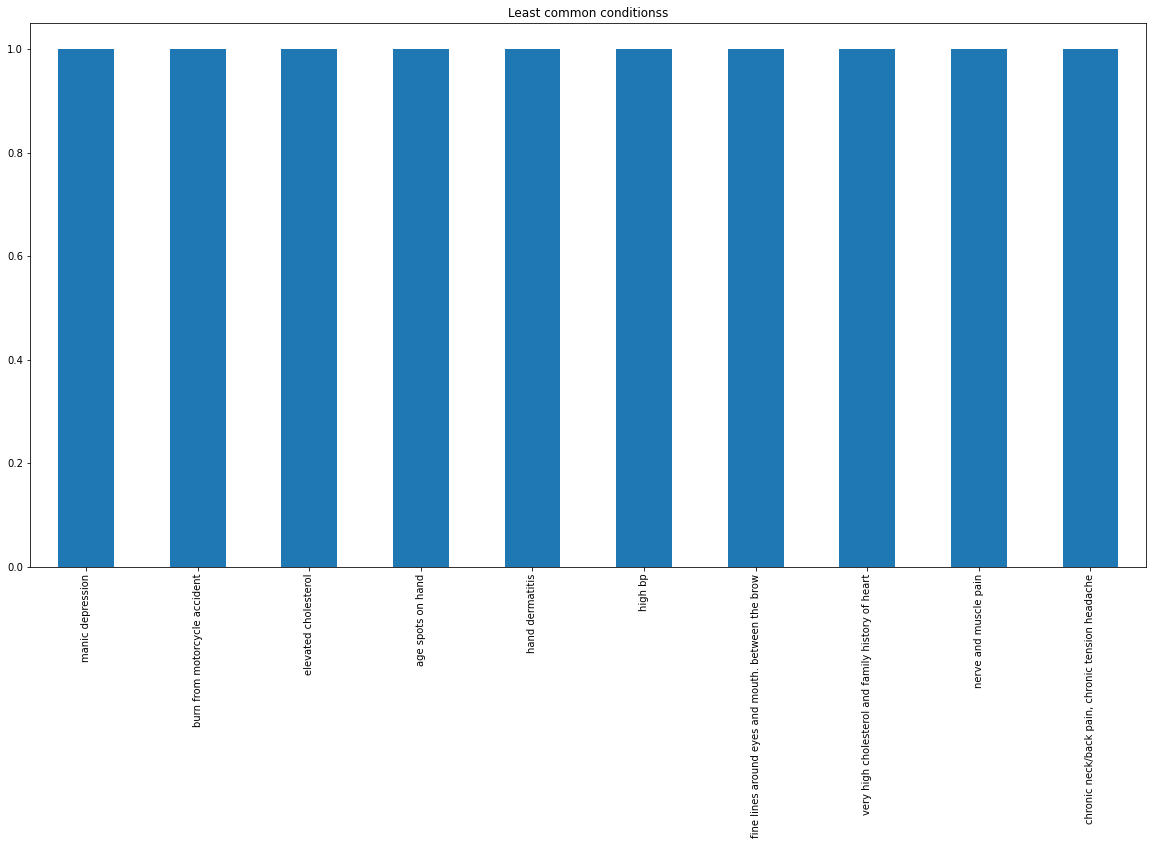

In [26]:
plt.figure(figsize=(20,10))
data['condition'].value_counts().nsmallest(10).plot(kind='bar')
plt.title('Least common conditionss')
plt.show()

The least common condition is chronic neck/back pain,chronic tension head ache

In [27]:
# to display no. of drugs per condition
data.groupby('condition')['urlDrugName'].nunique().nlargest(10)

condition
acne                   34
depression             29
anxiety                22
high blood pressure    21
insomnia               17
hypertension           16
migraines              14
allergies              13
add                    12
asthma                 12
Name: urlDrugName, dtype: int64

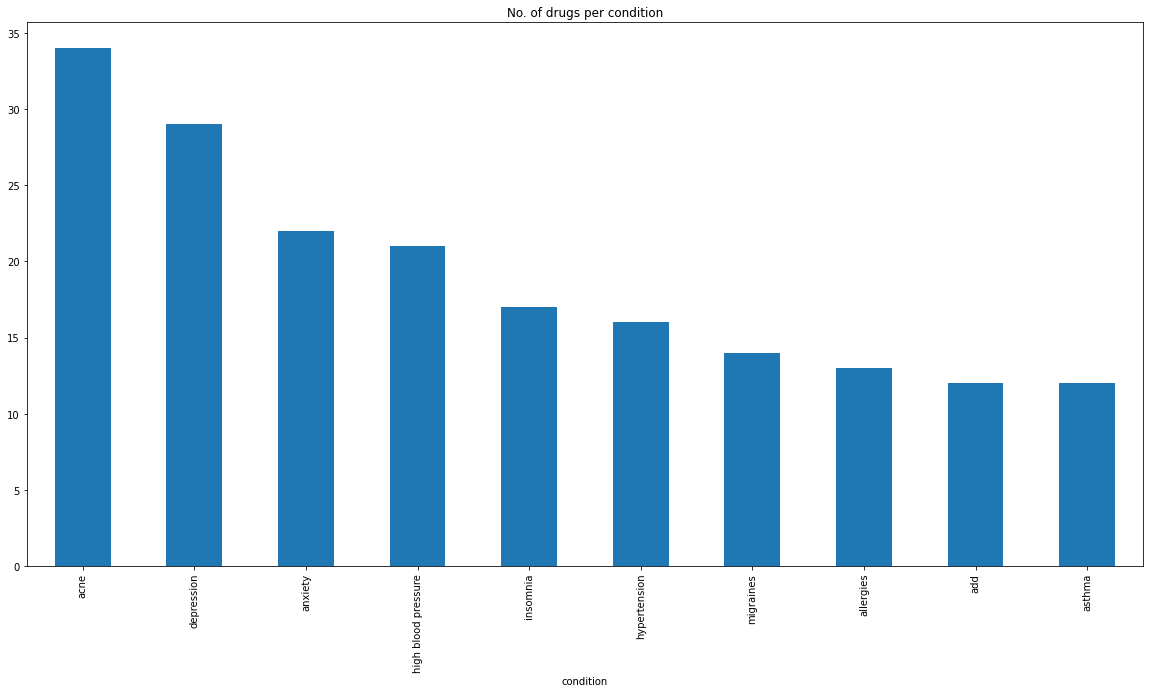

In [28]:
plt.figure(figsize=(20,10))
data.groupby('condition')['urlDrugName'].nunique().nlargest(10).plot(kind='bar')
plt.title('No. of drugs per condition')
plt.show()

More no. of drugs are available for acne

<AxesSubplot:xlabel='rating'>

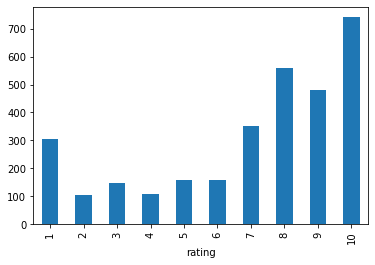

In [30]:
# Distribution of rating
data.groupby('rating').size().plot(kind='bar')

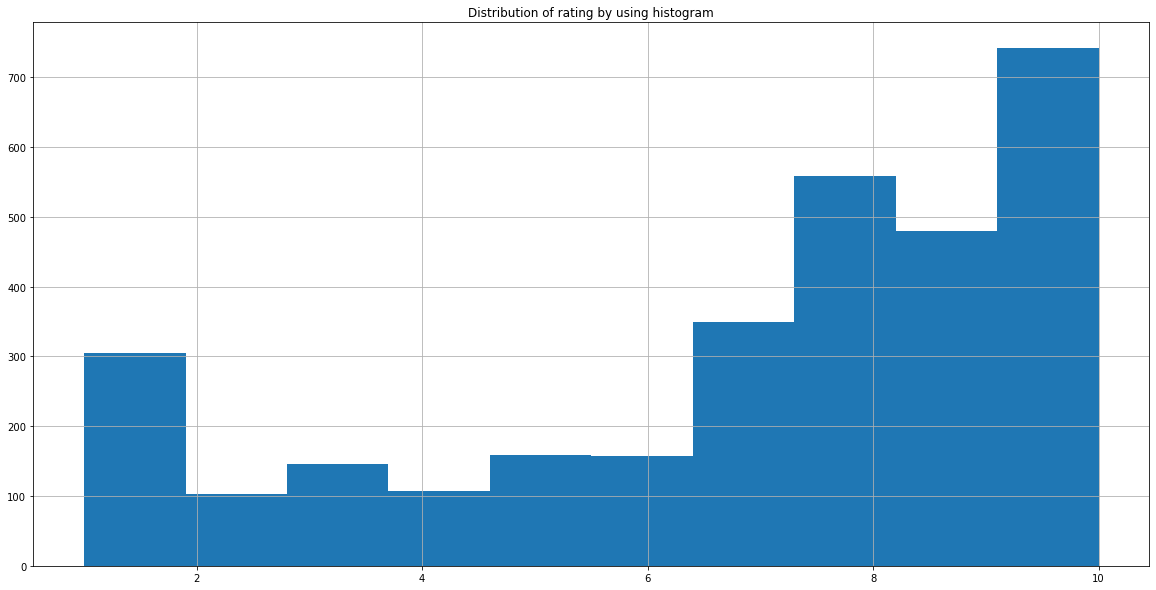

In [31]:
#Distribution of size by using histogram
plt.figure(figsize=(20,10))
data['rating'].hist()
plt.title('Distribution of rating by using histogram')
plt.show()

Most people gave a good rating of 10 and 8

In [33]:
#Average rating
avg_rating=(data['rating'].groupby(data['urlDrugName']).mean())

In [39]:
avg_rating.nlargest(20)

urlDrugName
androgel         10.0
antivert         10.0
asmanex          10.0
atripla          10.0
avapro           10.0
axert            10.0
azopt            10.0
baraclude        10.0
bisoprolol       10.0
buprenorphine    10.0
bystolic         10.0
cataflam         10.0
delestrogen      10.0
dextrostat       10.0
elocon           10.0
erythra-derm     10.0
estrasorb        10.0
estratest        10.0
estrostep-fe     10.0
eulexin          10.0
Name: rating, dtype: float64

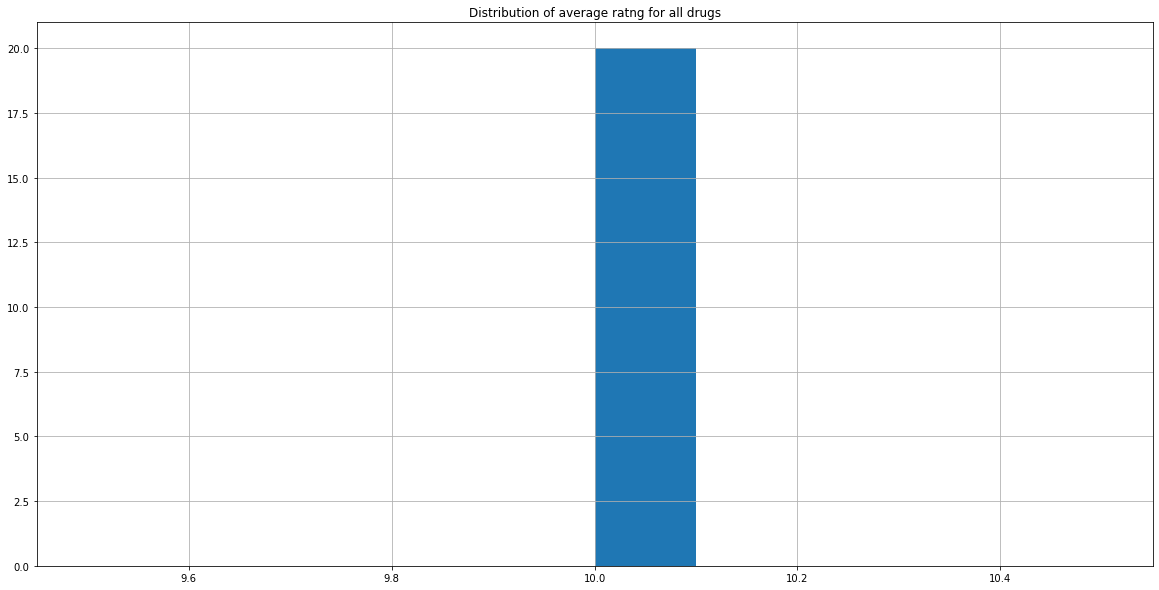

In [40]:
plt.figure(figsize=(20,10))
avg_rating.nlargest(20).hist()
plt.title('Distribution of average ratng for top 20 drugs')
plt.show()

In [41]:
data.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')